In [1]:
#loading Important Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

In [2]:
#loading The data set
df=pd.read_csv(r"C:\Users\ankit\Desktop\All practice sheet\housing_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.shape

(1460, 81)

### DATA CLEANING

In [5]:
#checking duplicate
df.duplicated().sum()

np.int64(0)

In [6]:
#checking null values
df.isna().sum().sort_values(ascending=False)

Alley            1369
MasVnrType        872
GarageYrBlt        81
Electrical          1
Unnamed: 0          0
LotArea             0
MSSubClass          0
LotFrontage         0
MSZoning            0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Street              0
LotShape            0
LandContour         0
HouseStyle          0
BldgType            0
Condition2          0
YearBuilt           0
RoofStyle           0
RoofMatl            0
Exterior1st         0
OverallQual         0
Exterior2nd         0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
OverallCond         0
BsmtExposure        0
BsmtFinType1        0
BsmtFinType2        0
BsmtFinSF1          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
BsmtFinSF2          0
HeatingQC           0
CentralAir          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [7]:
#So we are dropping Alley column because it has 93% missing values
df.drop(columns=['Alley'],inplace=True)

In [8]:
# Dropping Unamed column cause it is an index column
df.drop(columns=['Unnamed: 0'],inplace=True)

In [9]:
#Droppping Garage Built Year because it is almost same as YearBuilt
df.drop(columns=['GarageYrBlt'],inplace=True)

In [10]:
#Filling the missing value by 'None'
df['MasVnrType']=df['MasVnrType'].fillna('None')

In [11]:
md=df['Electrical'].mode()

In [12]:
df['Electrical']=df['Electrical'].fillna(md[0])

### Features Engineering 

In [13]:
df['PricePerSF'] = df['SalePrice'] / df['GrLivArea']

In [14]:
df['HouseAge'] = df['YrSold'] - df['YearBuilt']

In [15]:
df['TotalSF'] = df['TotalBsmtSF'] + df['GrLivArea']

In [16]:
df.isna().sum().sort_values(ascending=False)

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [17]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0       SC60       RL           65     8450   Pave      Reg         Lvl   
1       SC20       RL           80     9600   Pave      Reg         Lvl   
2       SC60       RL           68    11250   Pave      IR1         Lvl   
3       SC70       RL           60     9550   Pave      IR1         Lvl   
4       SC60       RL           84    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace         196        Gd        TA   
1  CompShg     MetalSd     MetalSd       None           0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace         162        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None           0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace         350        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0          No     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd   
3          Gd             7     

### Univariant Analysis

In [18]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

num_cols, cat_cols

(Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
        'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
        'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'SalePrice',
        'PricePerSF', 'HouseAge', 'TotalSF'],
       dtype='object'),
 Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
        'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
        'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
        'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
        'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
        'BsmtFinType2',

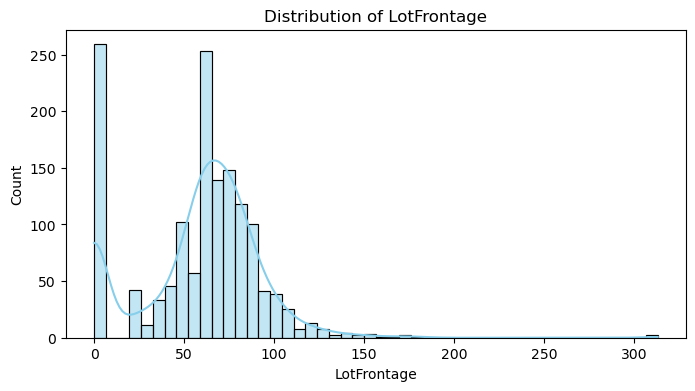

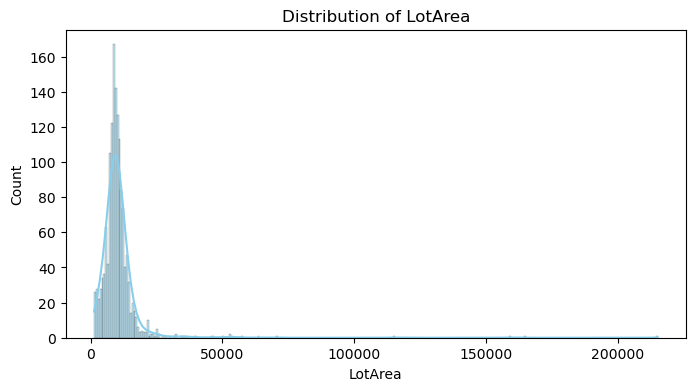

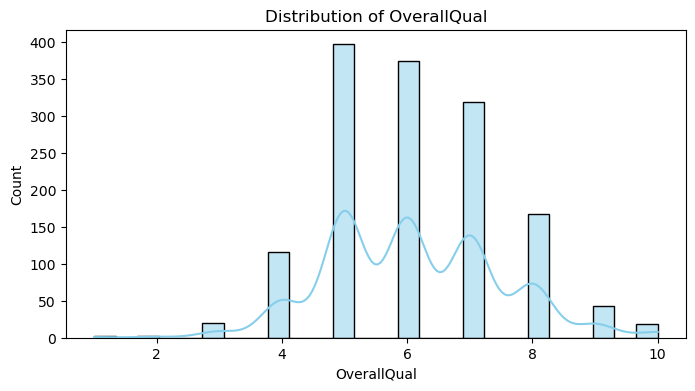

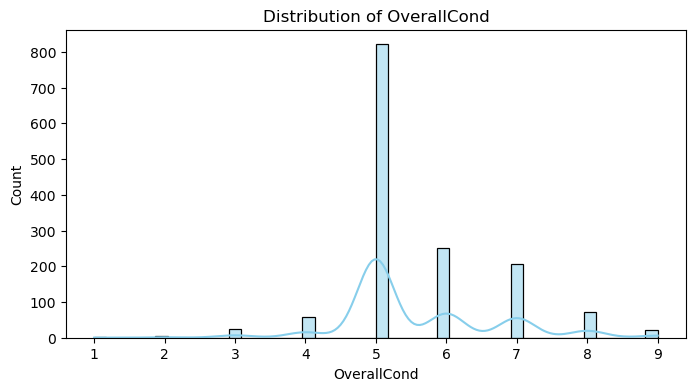

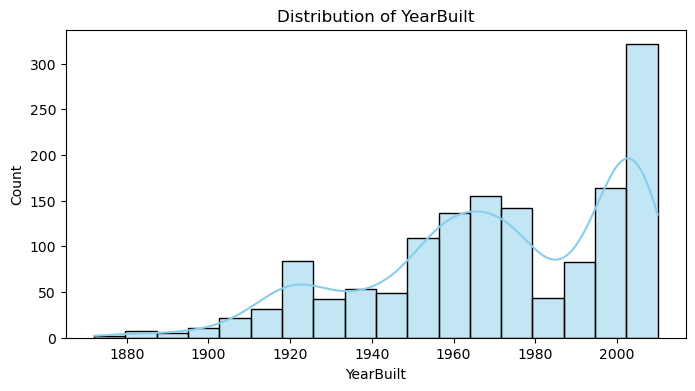

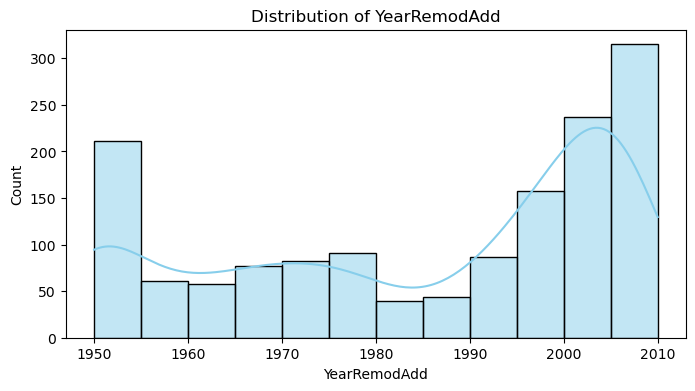

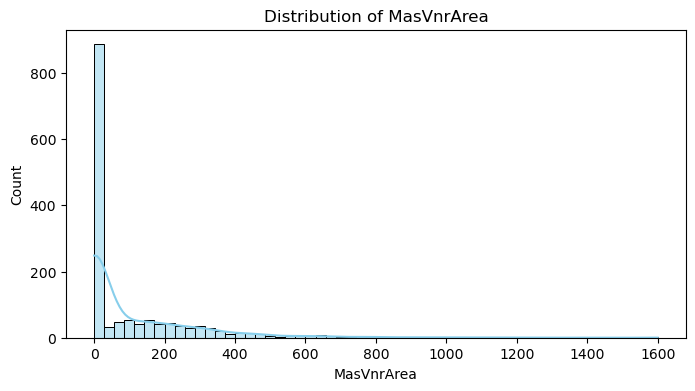

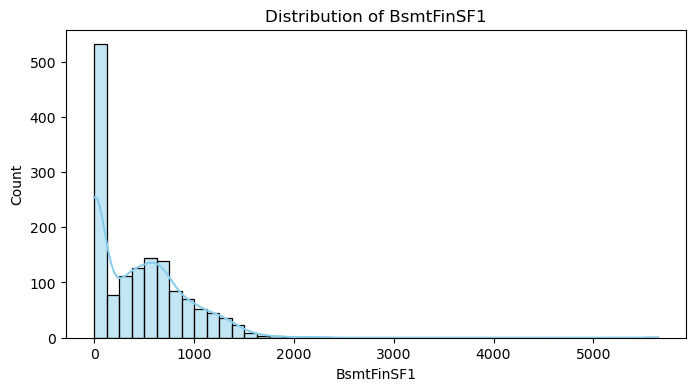

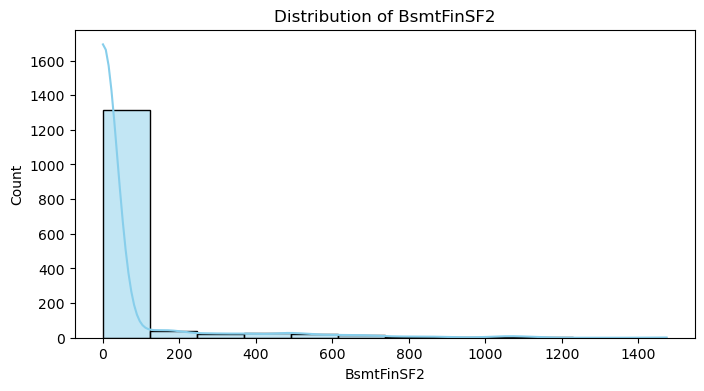

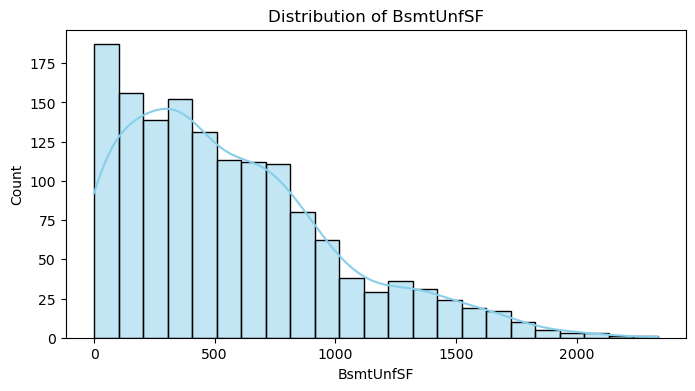

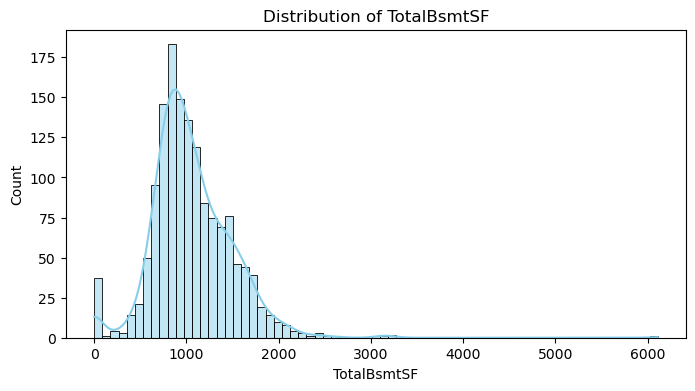

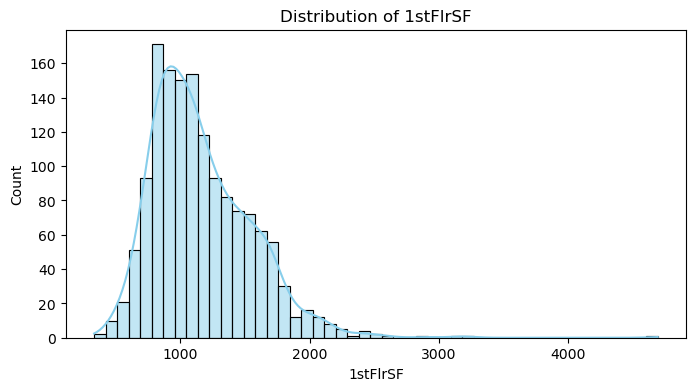

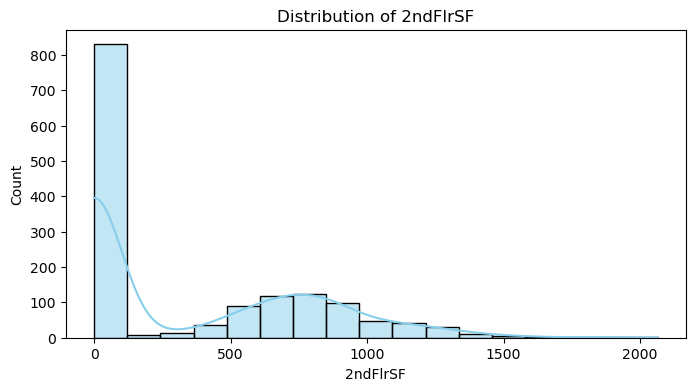

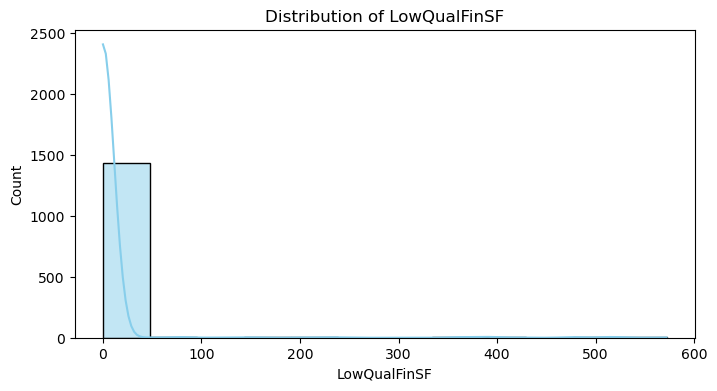

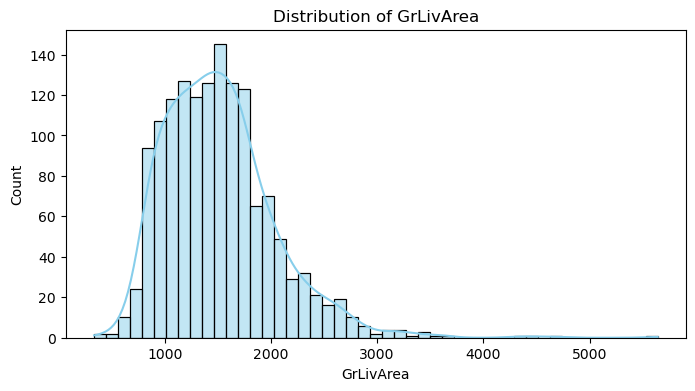

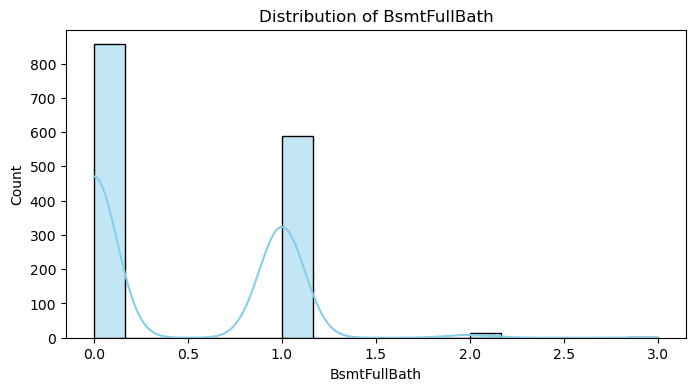

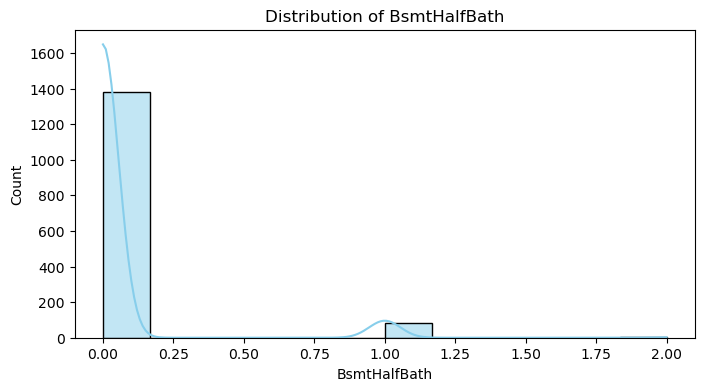

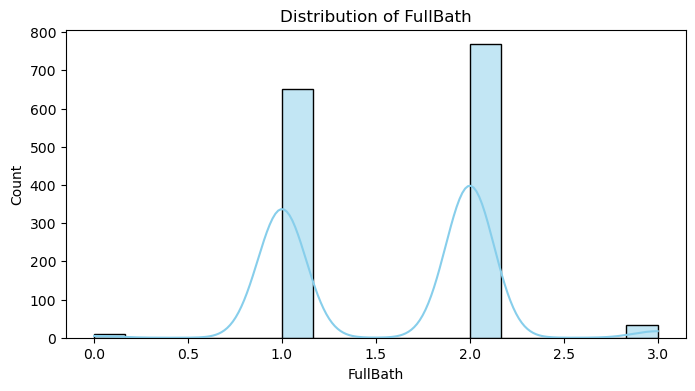

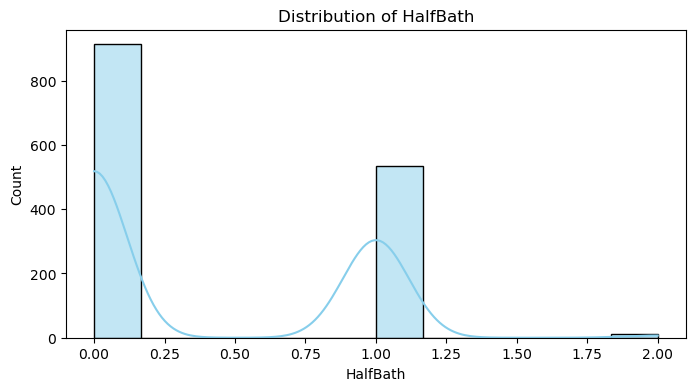

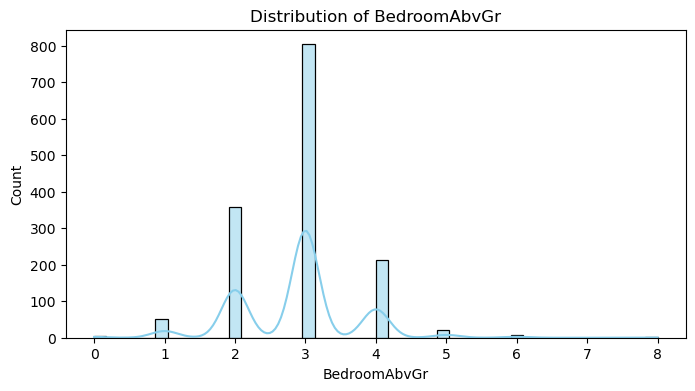

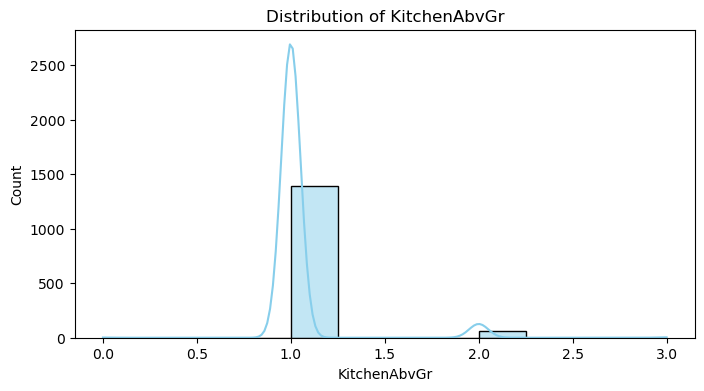

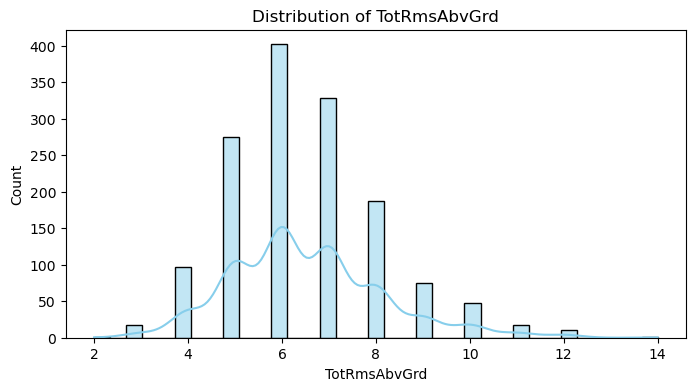

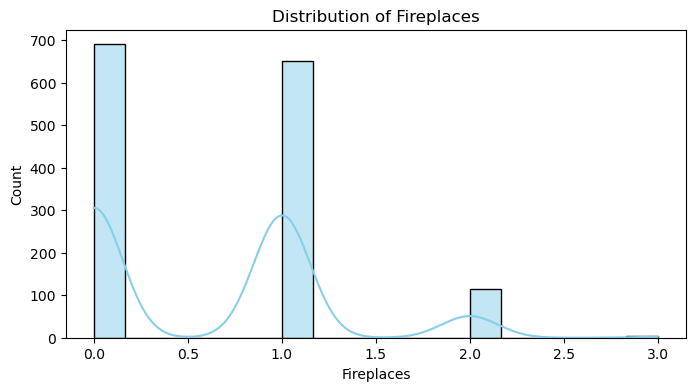

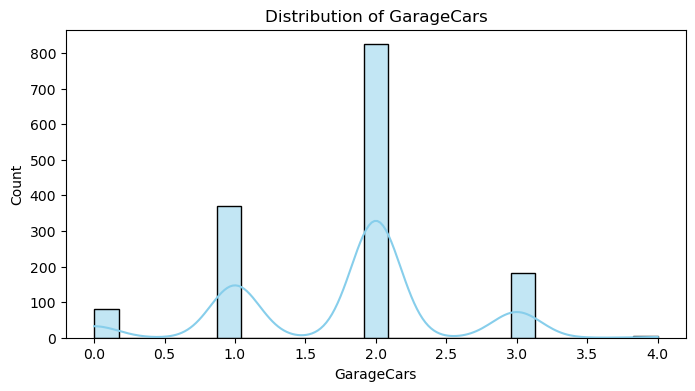

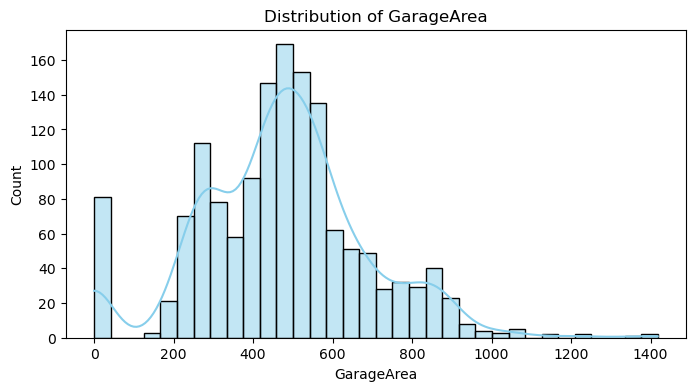

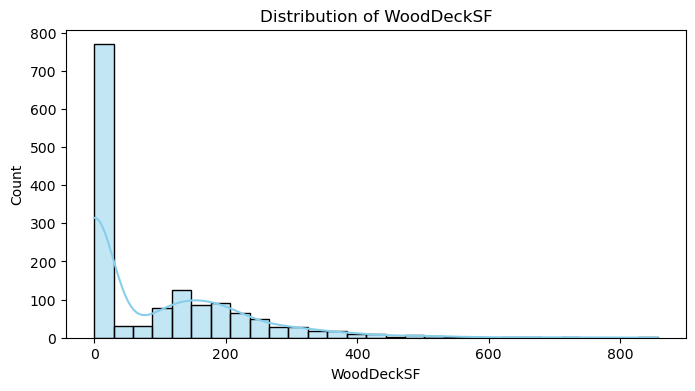

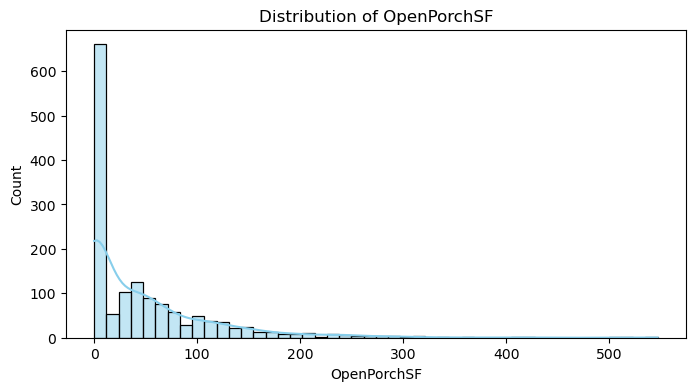

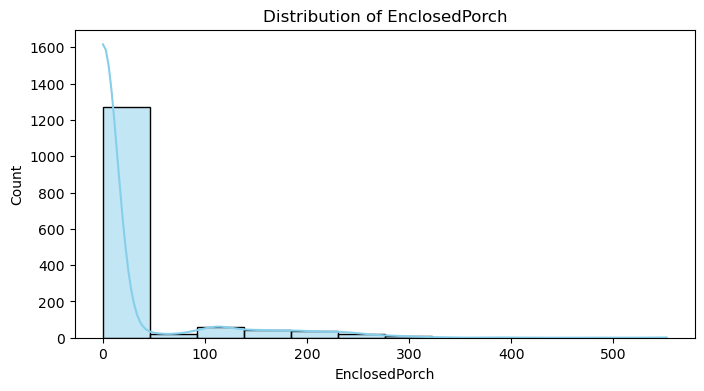

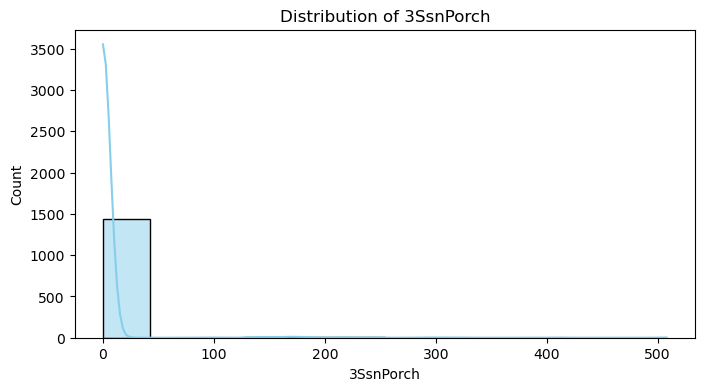

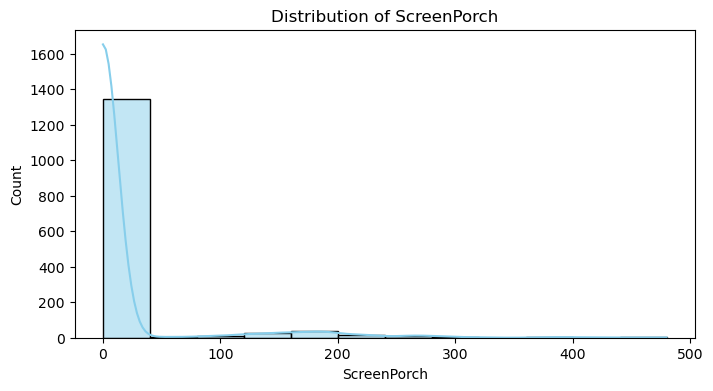

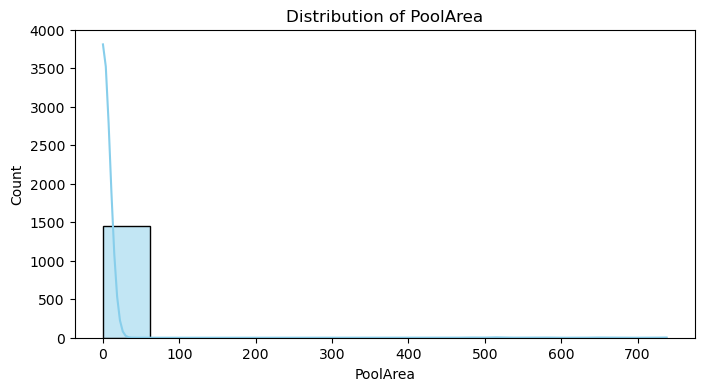

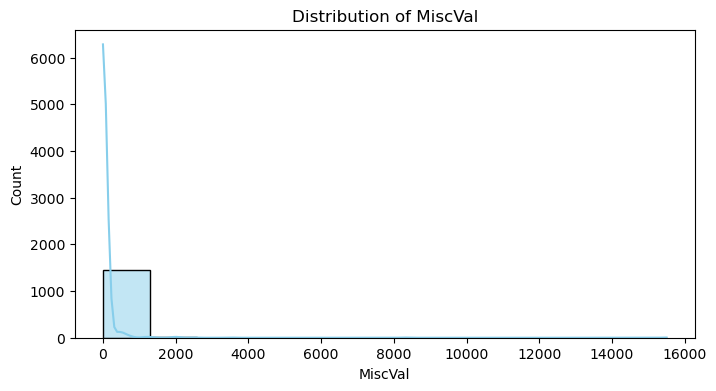

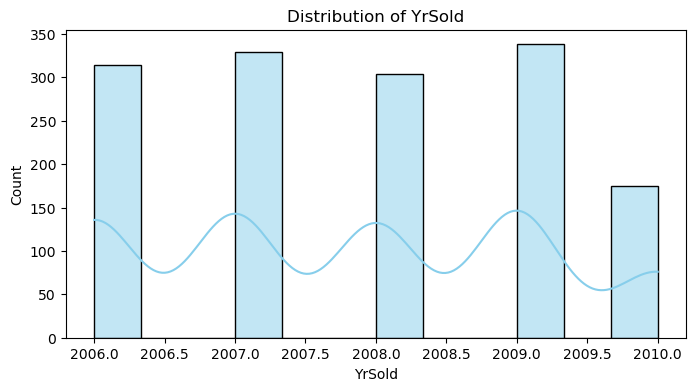

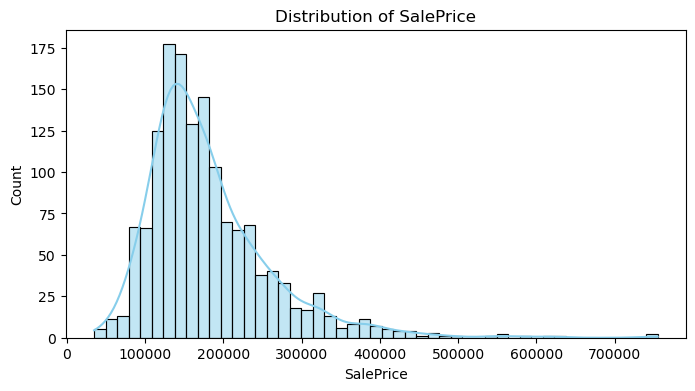

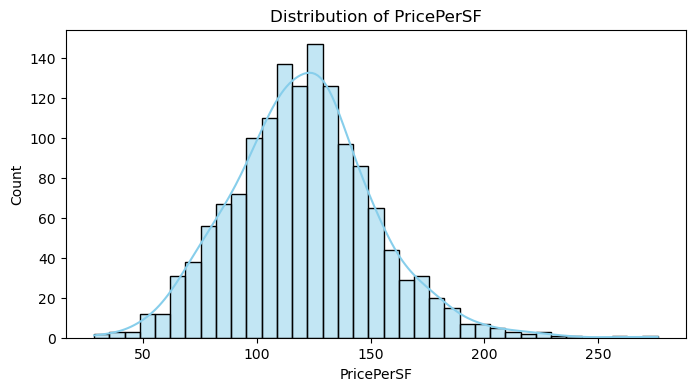

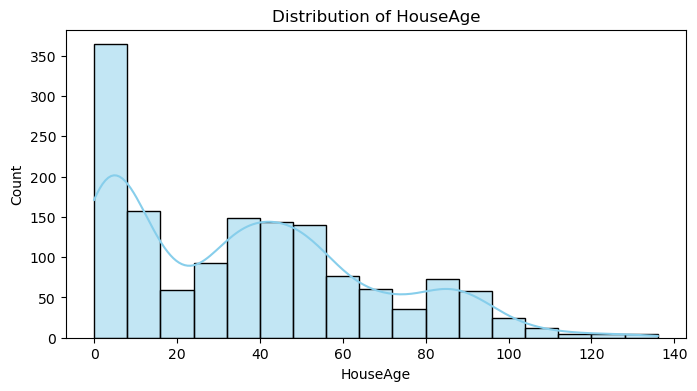

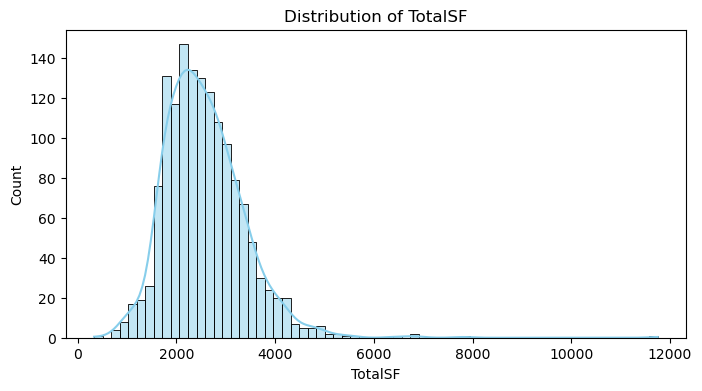

In [34]:
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.show()
###Numerical Variables
#Most numerical features (PropPrice, GrLivArea, BasementSqFootage) are right-skewed.
#Few outliers exist for large area and high-priced properties.
#Majority houses fall in mid-range values for size, rooms, and bathrooms.
#Time-based features show more houses built and renovated after 1950.

C:\Users\ankit\AppData\Local\Temp\ipykernel_21196\1658197918.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




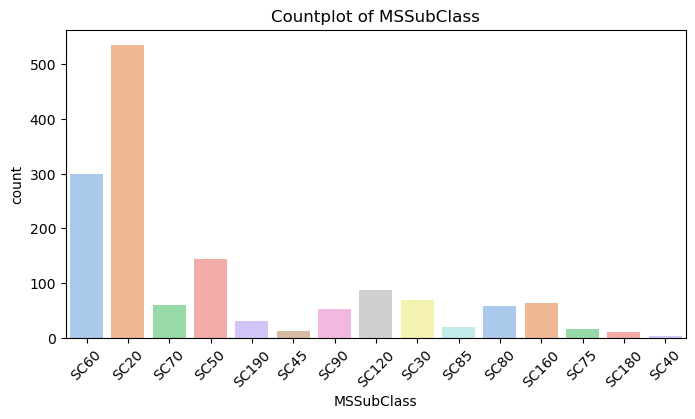

C:\Users\ankit\AppData\Local\Temp\ipykernel_21196\1658197918.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




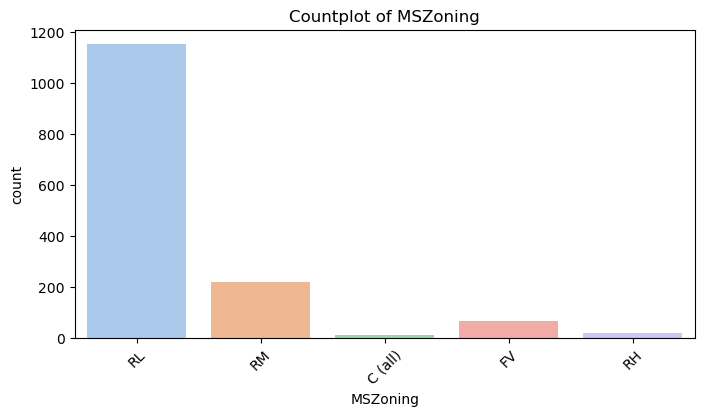

C:\Users\ankit\AppData\Local\Temp\ipykernel_21196\1658197918.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




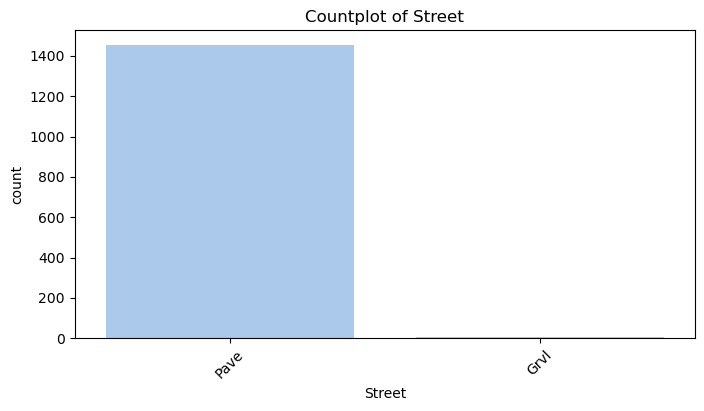

C:\Users\ankit\AppData\Local\Temp\ipykernel_21196\1658197918.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




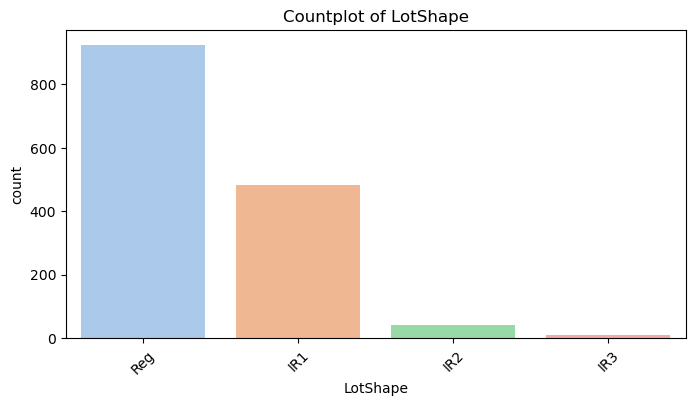

C:\Users\ankit\AppData\Local\Temp\ipykernel_21196\1658197918.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




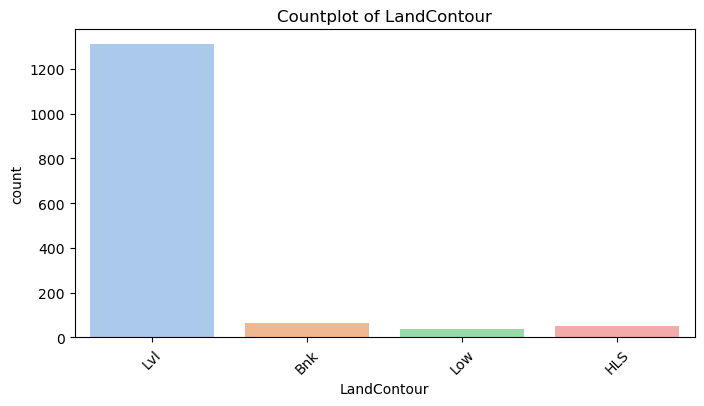

C:\Users\ankit\AppData\Local\Temp\ipykernel_21196\1658197918.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




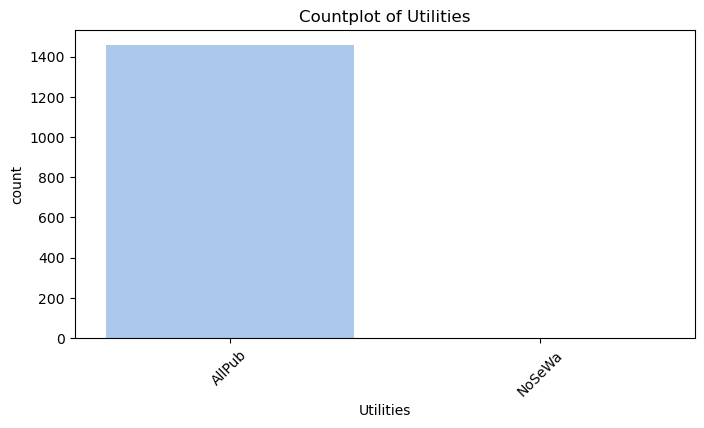

C:\Users\ankit\AppData\Local\Temp\ipykernel_21196\1658197918.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




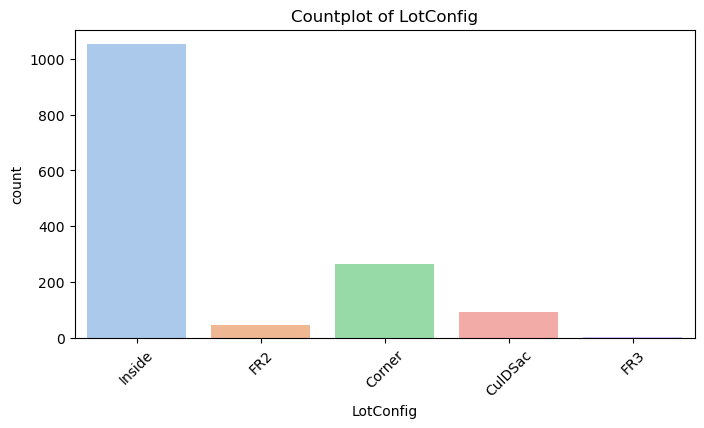

C:\Users\ankit\AppData\Local\Temp\ipykernel_21196\1658197918.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




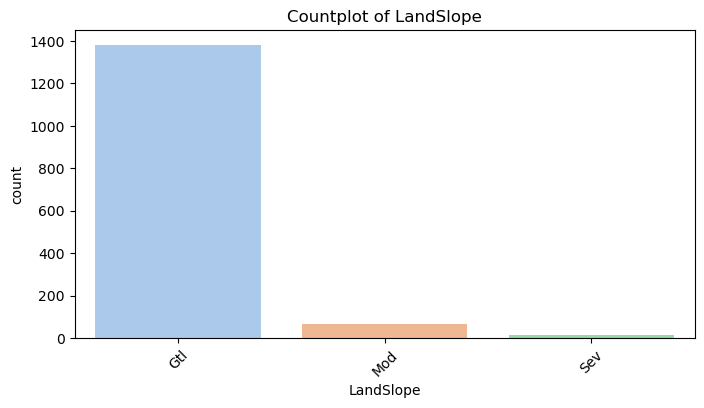

C:\Users\ankit\AppData\Local\Temp\ipykernel_21196\1658197918.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




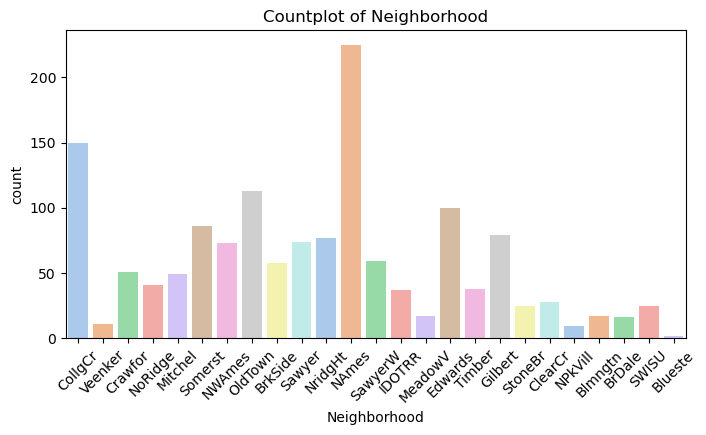

C:\Users\ankit\AppData\Local\Temp\ipykernel_21196\1658197918.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




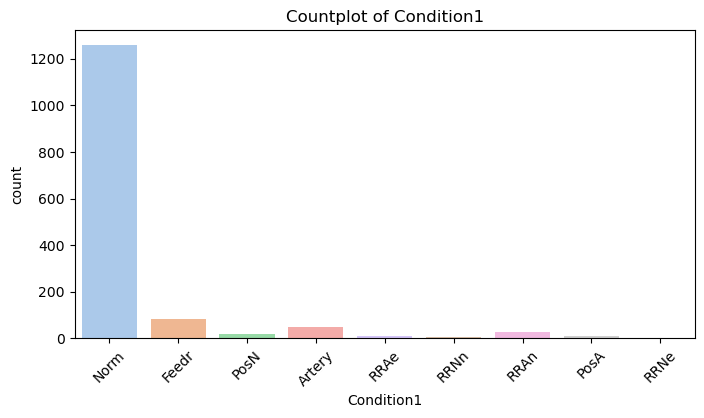

C:\Users\ankit\AppData\Local\Temp\ipykernel_21196\1658197918.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




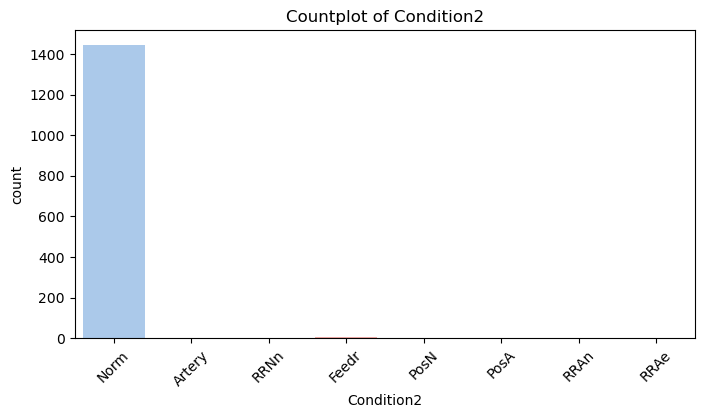

C:\Users\ankit\AppData\Local\Temp\ipykernel_21196\1658197918.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




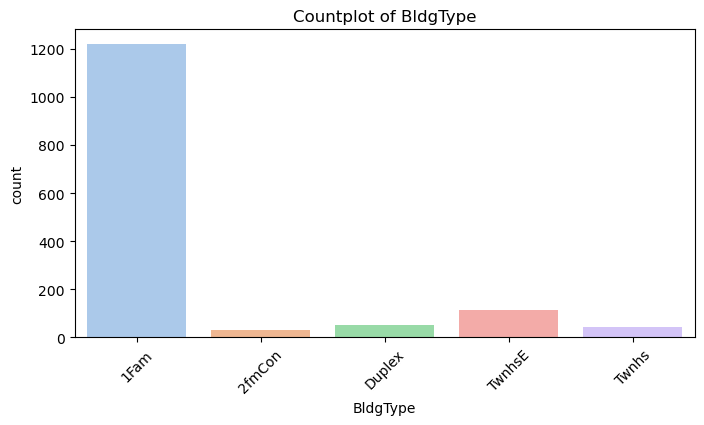

C:\Users\ankit\AppData\Local\Temp\ipykernel_21196\1658197918.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




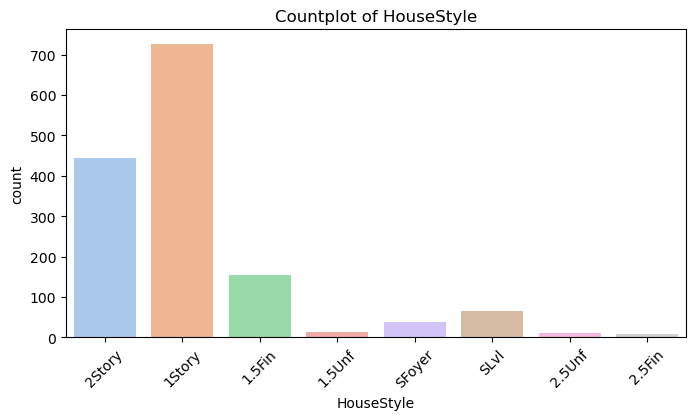

C:\Users\ankit\AppData\Local\Temp\ipykernel_21196\1658197918.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




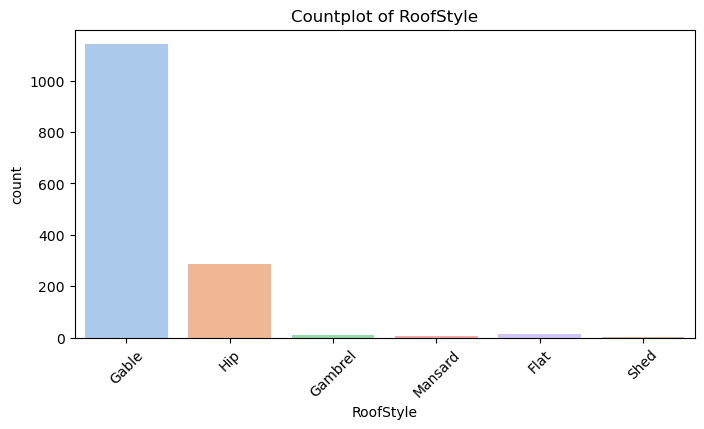

C:\Users\ankit\AppData\Local\Temp\ipykernel_21196\1658197918.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




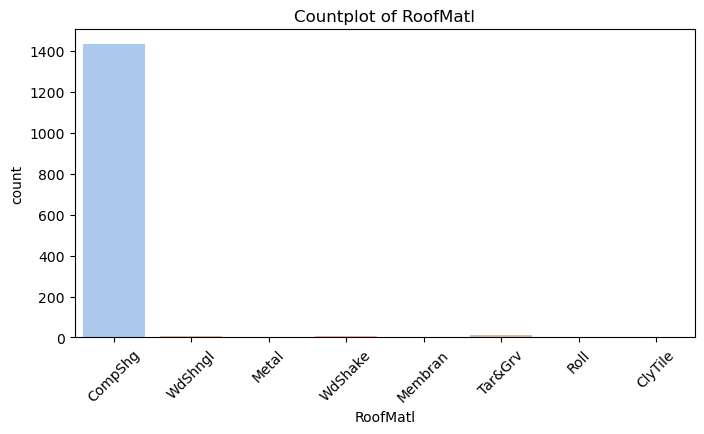

C:\Users\ankit\AppData\Local\Temp\ipykernel_21196\1658197918.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




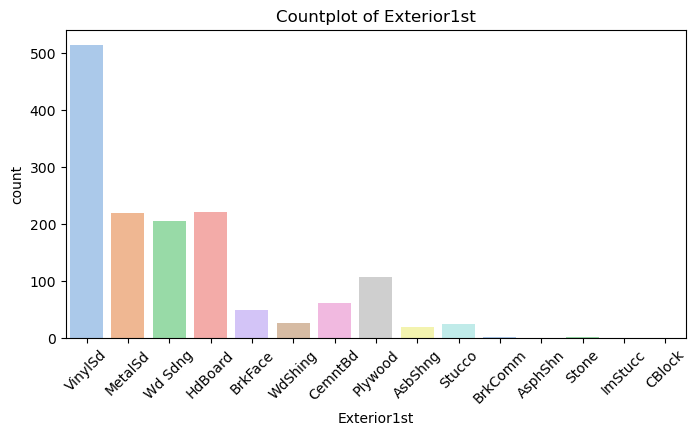

C:\Users\ankit\AppData\Local\Temp\ipykernel_21196\1658197918.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




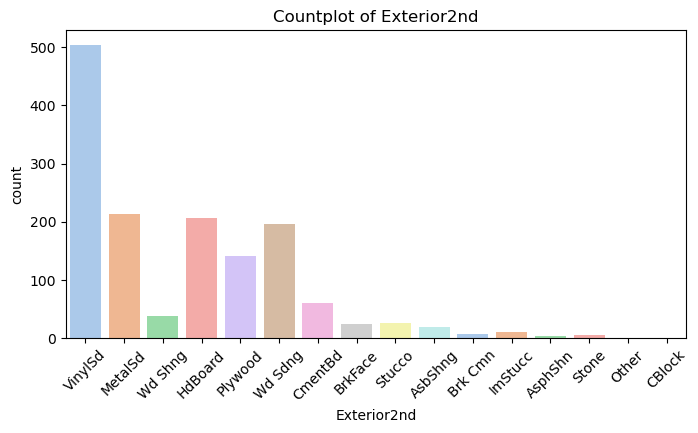

C:\Users\ankit\AppData\Local\Temp\ipykernel_21196\1658197918.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




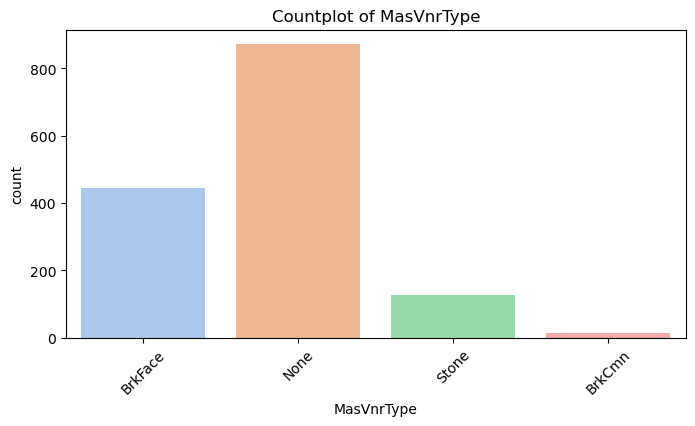

C:\Users\ankit\AppData\Local\Temp\ipykernel_21196\1658197918.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




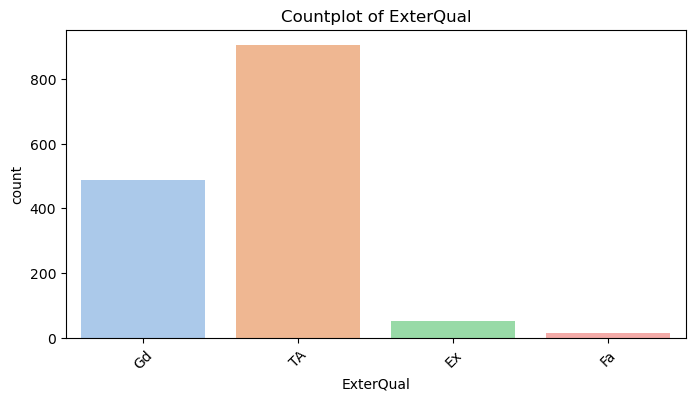

C:\Users\ankit\AppData\Local\Temp\ipykernel_21196\1658197918.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




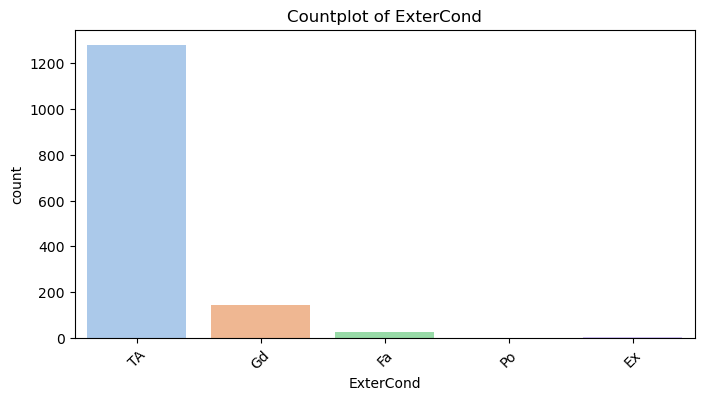

C:\Users\ankit\AppData\Local\Temp\ipykernel_21196\1658197918.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




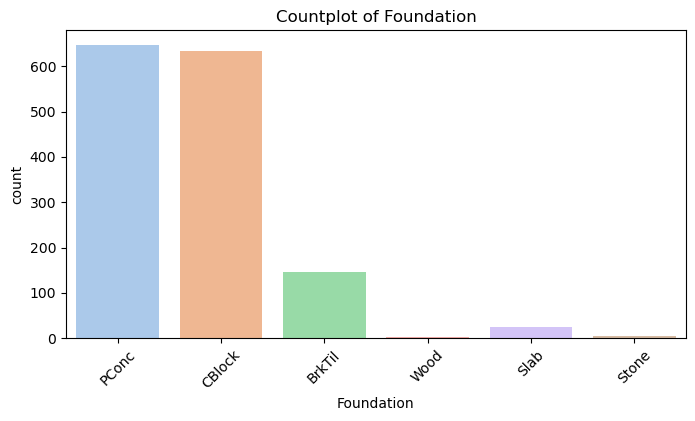

C:\Users\ankit\AppData\Local\Temp\ipykernel_21196\1658197918.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




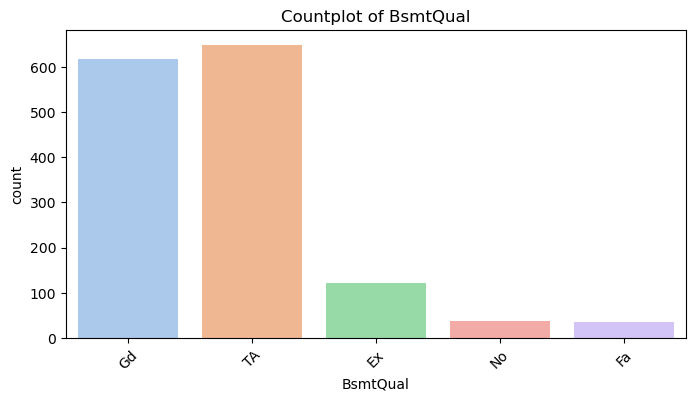

C:\Users\ankit\AppData\Local\Temp\ipykernel_21196\1658197918.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




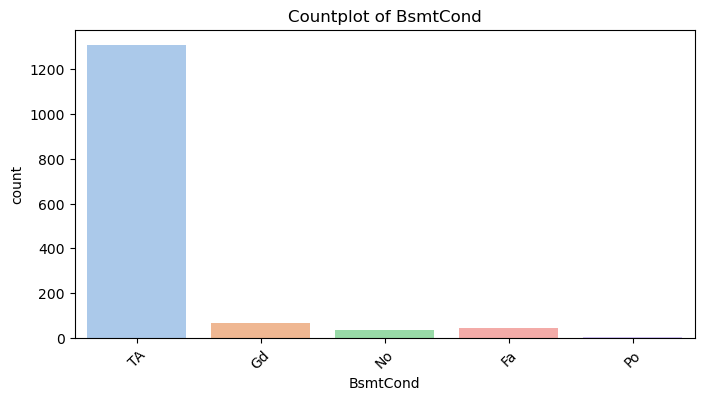

C:\Users\ankit\AppData\Local\Temp\ipykernel_21196\1658197918.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




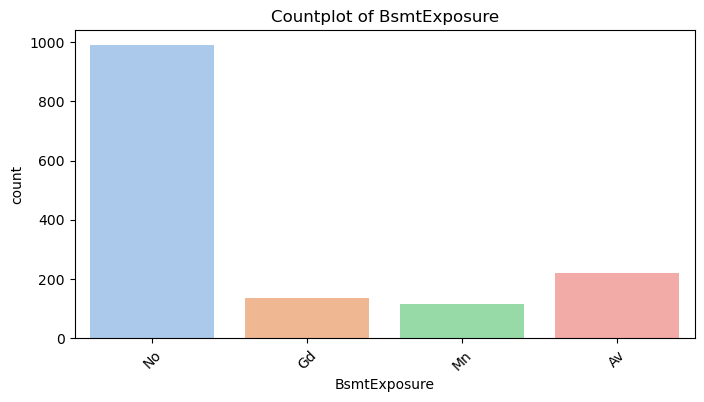

C:\Users\ankit\AppData\Local\Temp\ipykernel_21196\1658197918.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




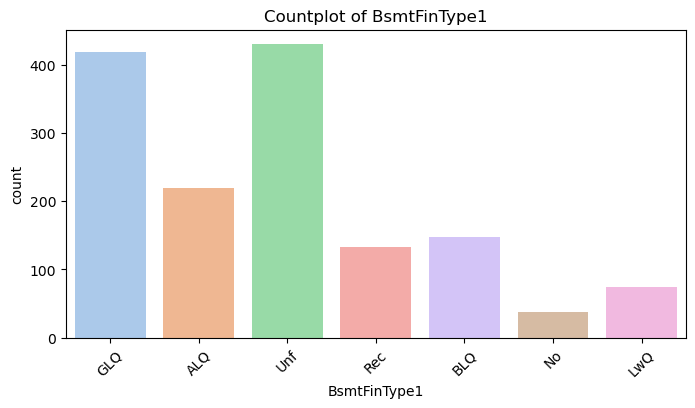

C:\Users\ankit\AppData\Local\Temp\ipykernel_21196\1658197918.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




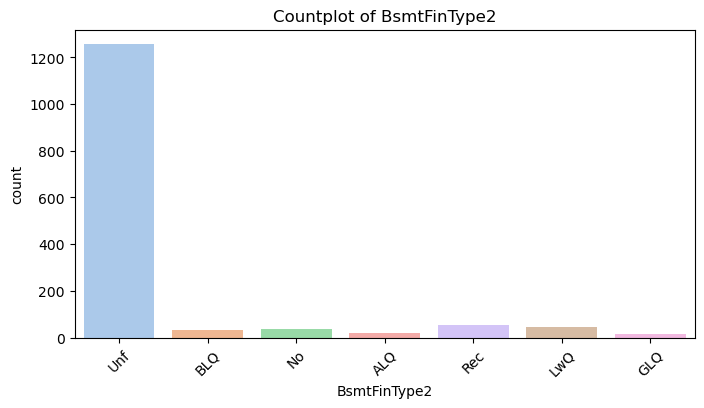

C:\Users\ankit\AppData\Local\Temp\ipykernel_21196\1658197918.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




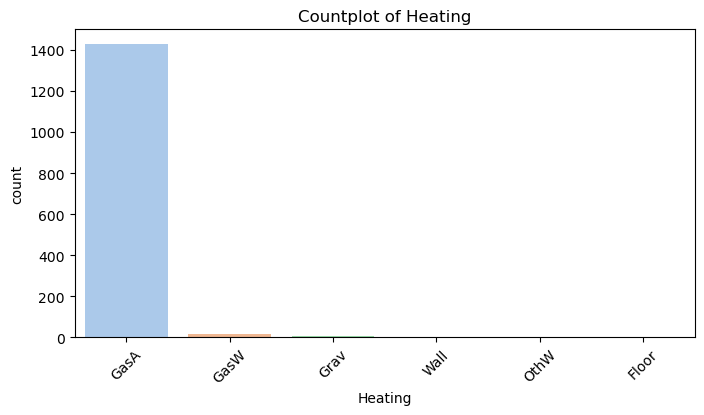

C:\Users\ankit\AppData\Local\Temp\ipykernel_21196\1658197918.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




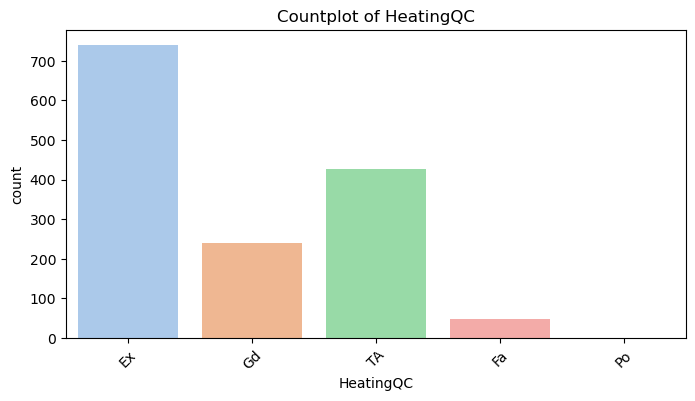

C:\Users\ankit\AppData\Local\Temp\ipykernel_21196\1658197918.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




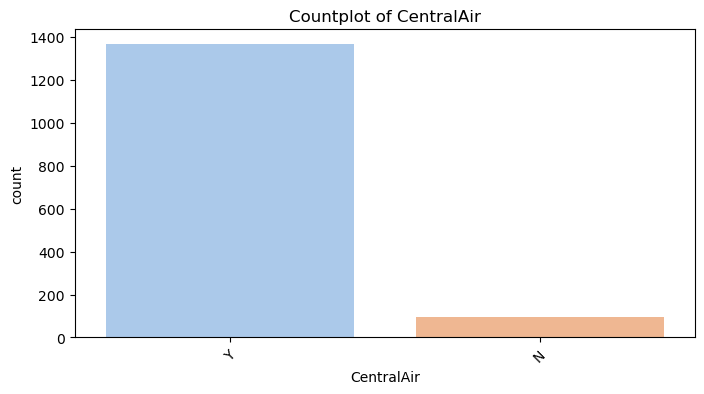

C:\Users\ankit\AppData\Local\Temp\ipykernel_21196\1658197918.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




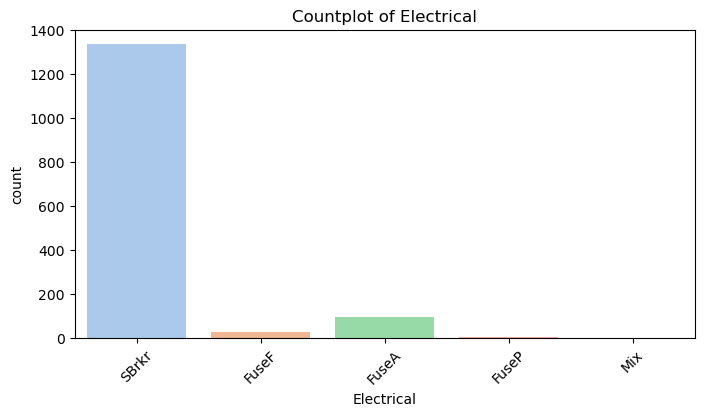

C:\Users\ankit\AppData\Local\Temp\ipykernel_21196\1658197918.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




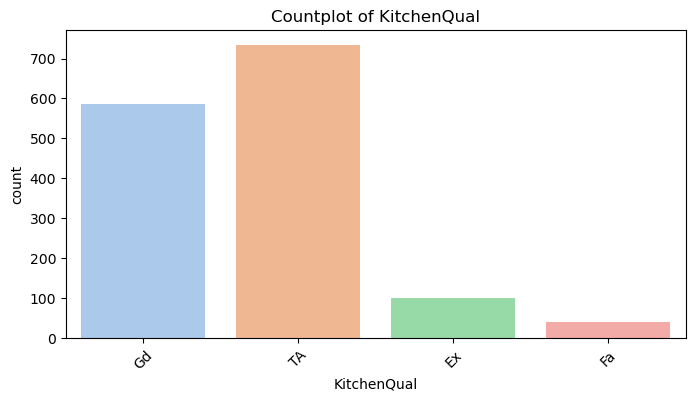

C:\Users\ankit\AppData\Local\Temp\ipykernel_21196\1658197918.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




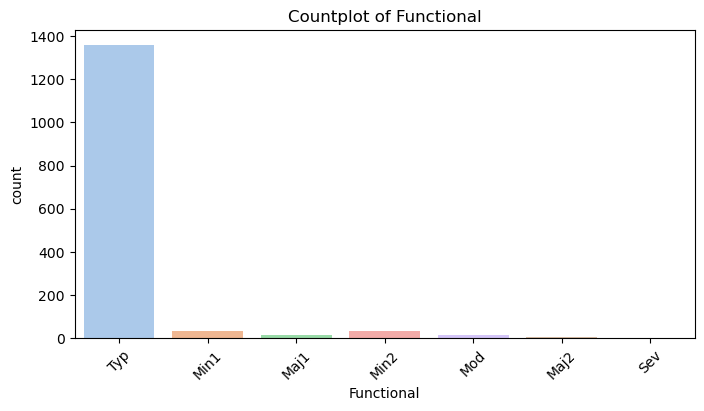

C:\Users\ankit\AppData\Local\Temp\ipykernel_21196\1658197918.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




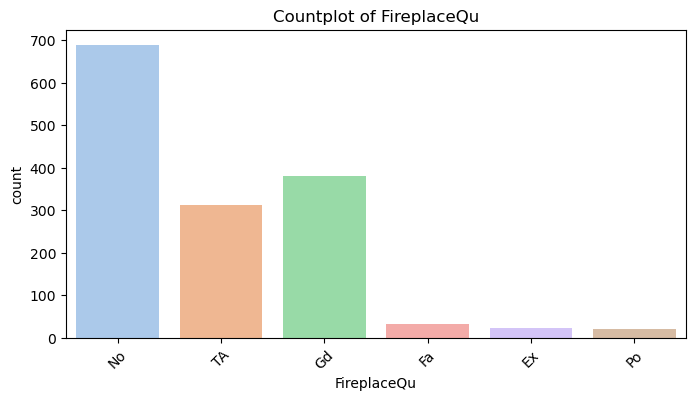

C:\Users\ankit\AppData\Local\Temp\ipykernel_21196\1658197918.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




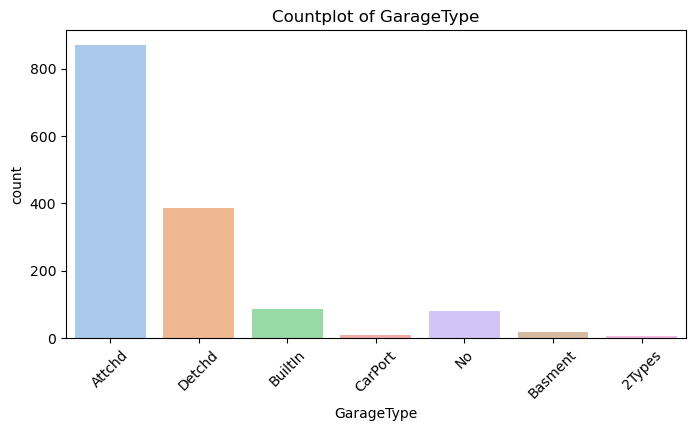

C:\Users\ankit\AppData\Local\Temp\ipykernel_21196\1658197918.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




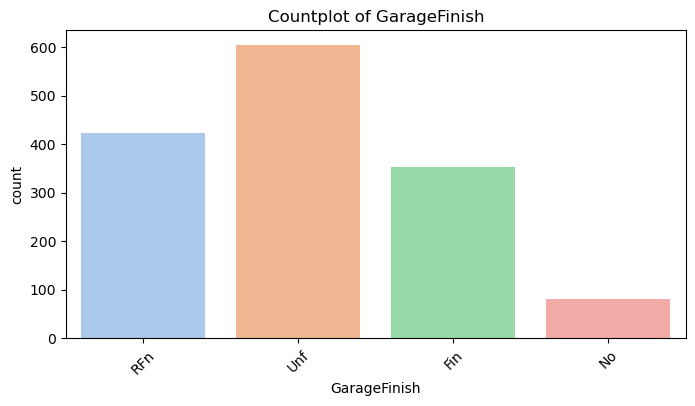

C:\Users\ankit\AppData\Local\Temp\ipykernel_21196\1658197918.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




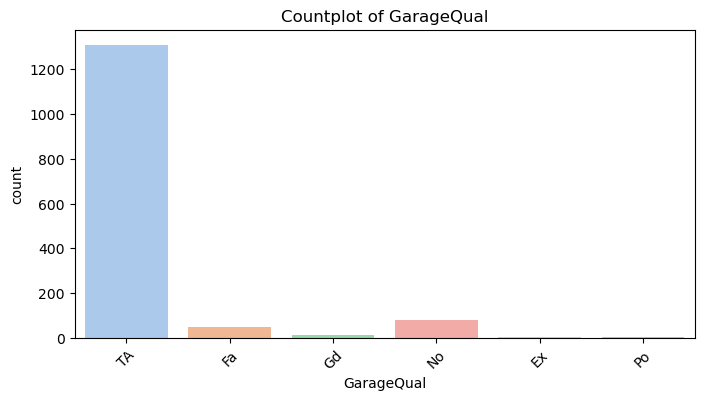

C:\Users\ankit\AppData\Local\Temp\ipykernel_21196\1658197918.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




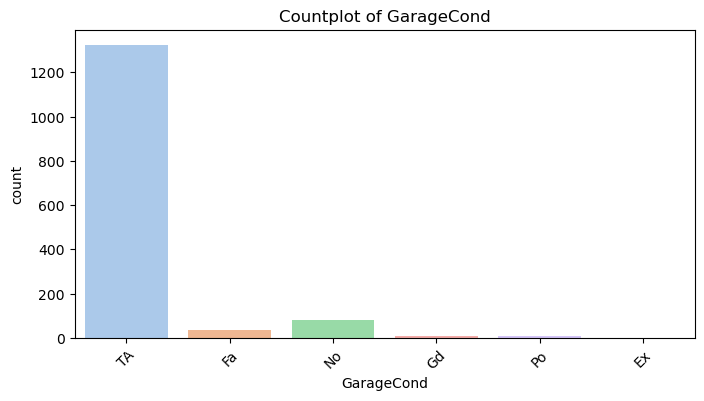

C:\Users\ankit\AppData\Local\Temp\ipykernel_21196\1658197918.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




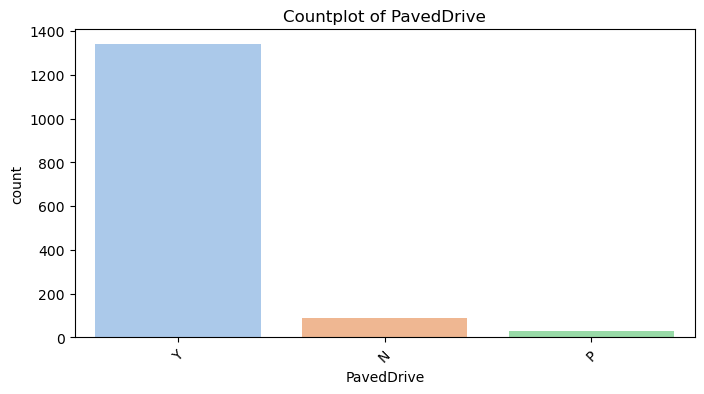

C:\Users\ankit\AppData\Local\Temp\ipykernel_21196\1658197918.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




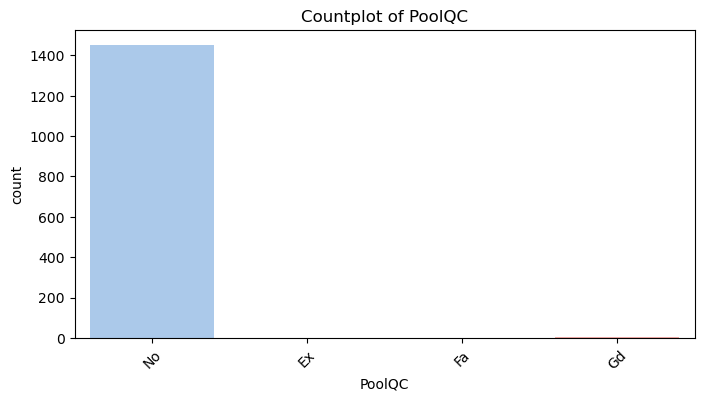

C:\Users\ankit\AppData\Local\Temp\ipykernel_21196\1658197918.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




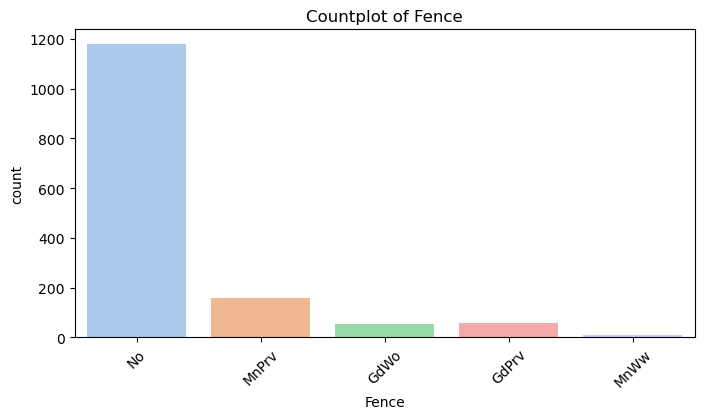

C:\Users\ankit\AppData\Local\Temp\ipykernel_21196\1658197918.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




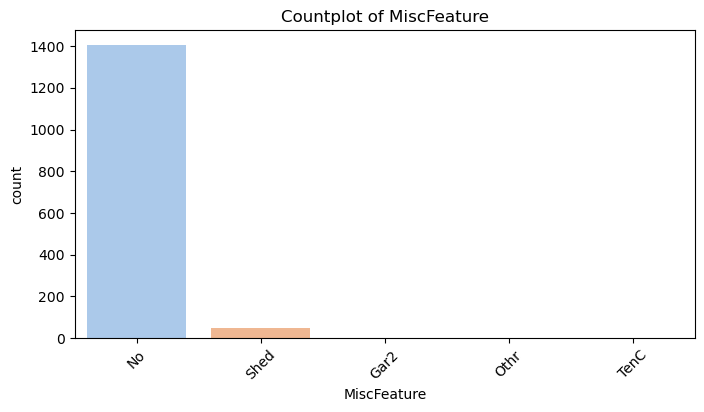

C:\Users\ankit\AppData\Local\Temp\ipykernel_21196\1658197918.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




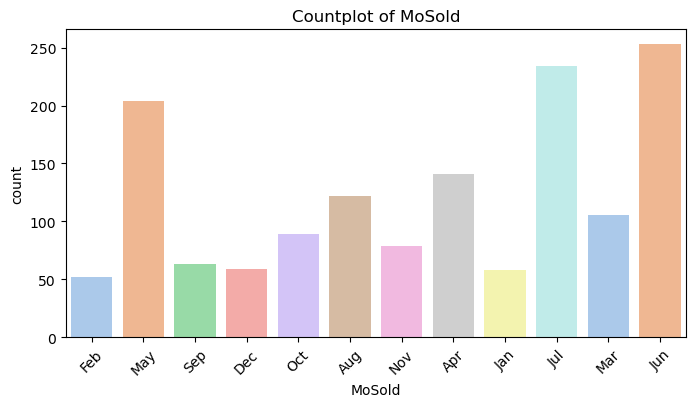

C:\Users\ankit\AppData\Local\Temp\ipykernel_21196\1658197918.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




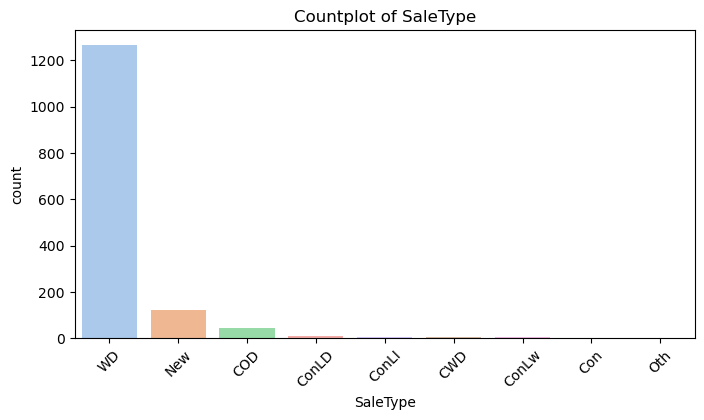

C:\Users\ankit\AppData\Local\Temp\ipykernel_21196\1658197918.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




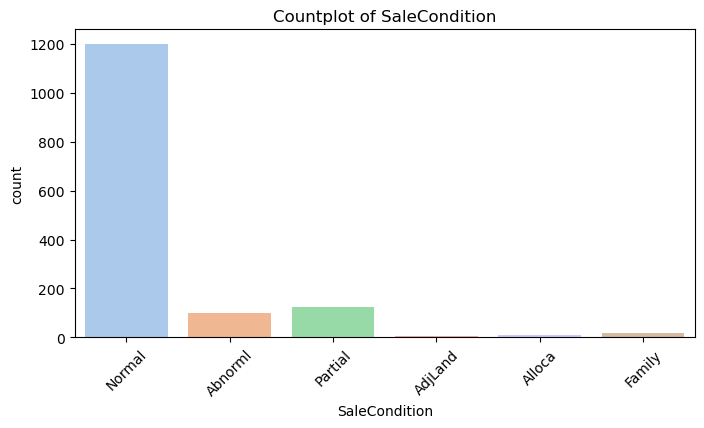

In [35]:
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=df[col],palette='pastel')
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.show()
#Categorical Variables
#Most properties belong to single-family residential type and RL zoning.
#Quality-related categories are mostly TA (Average) and Gd (Good).
#Some categories have very low frequency, showing low variance.
#Amenities like pool, special porches, and rare roof types are uncommon.

### BiVariate Analysis

In [21]:
fig = px.scatter(df,x="GrLivArea",y="SalePrice",title="Living Area vs Sale Price",labels={"GrLivArea": "Living Area (sqft)", "SalePrice": "Sale Price"},opacity=0.75,color_discrete_sequence=["#1f77b4"])
fig.show()
#GrLivArea exhibits a strong positive correlation with SalePrice. As above-ground living area increases, house prices rise significantly. 
#A few outliers with very large living areas are observed at the higher price range.

C:\Users\ankit\anaconda3\Lib\site-packages\kaleido\_sync_server.py:11: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.




In [22]:
fig = px.box(df,x="OverallQual",y="SalePrice",title="Overall Quality vs Sale Price",labels={"OverallQual": "Quality Rating", "SalePrice": "Sale Price"},color_discrete_sequence=["#17becf"])
fig.show()
#OverallQual has one of the strongest relationships with SalePrice. 
#Higher quality ratings consistently correspond to higher house prices, making OverallQual a key determinant of property value.

In [23]:
fig = px.box(df,x="LotShape",y="SalePrice",title="Lot Shape vs Sale Price",labels={"LotShape": "Lot Shape", "SalePrice": "Sale Price"},color_discrete_sequence=["#ff7f0e"])
fig.show()
#Properties with irregular lot shapes (IR1, IR2, IR3) generally exhibit higher median sale prices compared to regular lots. 
#This suggests that irregular lots may offer larger land areas or unique layouts that add value. However, regular lots show more consistent pricing with fewer extreme outliers.

In [24]:
fig = px.scatter(df, x="TotalSF", y="SalePrice",title="Total Square Footage vs Sale Price",opacity=0.7,color_discrete_sequence=["#1f77b4"])
fig.show()
#TotalSF shows a strong positive relationship with SalePrice. 
#Properties with greater total square footage command significantly higher prices, 
#confirming the importance of overall size in pricing decisions.

### Multivariate Analysis

### Corelation Analysis

In [25]:
corr = df.corr(numeric_only=True)
top_corr = corr['SalePrice'].abs().sort_values(ascending=False).head(10)
top_corr

SalePrice      1.000000
OverallQual    0.790982
TotalSF        0.778959
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
PricePerSF     0.575505
FullBath       0.560664
Name: SalePrice, dtype: float64

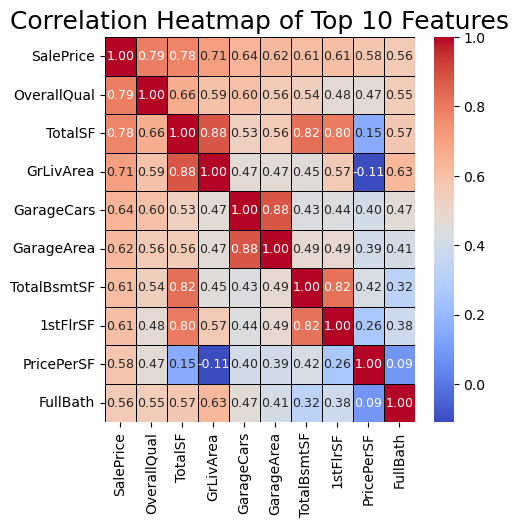

In [26]:
top_features = top_corr.index
plt.figure(figsize=(5, 5))
sns.heatmap(corr.loc[top_features, top_features],annot=True,fmt=".2f",cmap="coolwarm",linewidths=0.5,linecolor='black',annot_kws={"size": 9})
plt.title("Correlation Heatmap of Top 10 Features", fontsize=18)
plt.show()
#The correlation heatmap highlights that OverallQual (0.79), TotalSF (0.78), and GrLivArea (0.71) have the strongest positive correlations with SalePrice. 
#Garage-related features such as GarageCars and GarageArea also show moderate correlation, indicating their importance in property valuation. 
#PricePerSF shows relatively weaker correlation, suggesting that absolute size and quality have greater influence on house prices than per-square-foot pricing alone.

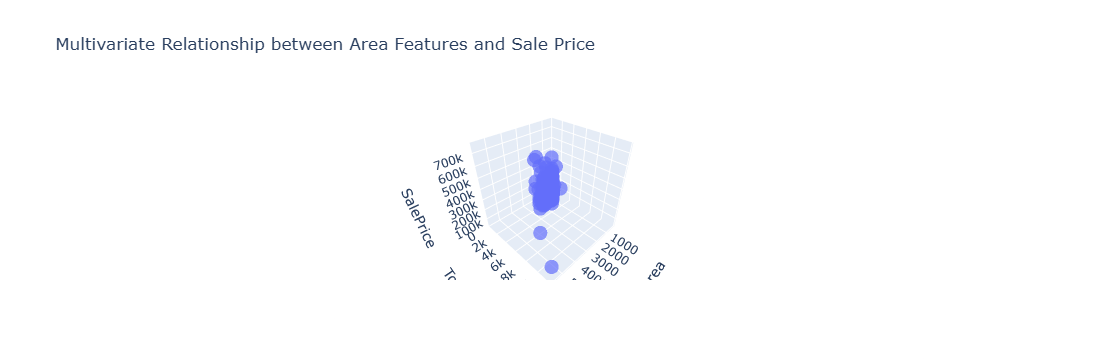

In [41]:
fig = px.scatter_3d(df,x='GrLivArea',y='TotalSF',z='SalePrice',title='Multivariate Relationship between Area Features and Sale Price',opacity=0.7)
fig.show()
#The 3D scatter plot demonstrates the combined effect of above-ground living area and total square footage on house prices. 
#Properties with higher GrLivArea and TotalSF tend to achieve significantly higher sale prices, highlighting the cumulative impact of size-related features on valuation.

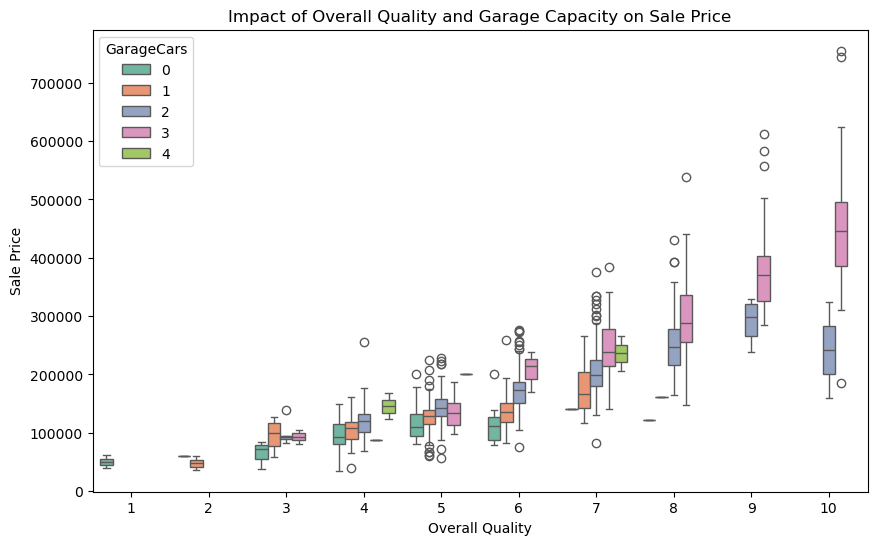

In [42]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='OverallQual',y='SalePrice',hue='GarageCars',palette='Set2')
plt.title('Impact of Overall Quality and Garage Capacity on Sale Price')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()
#The boxplot illustrates that sale prices increase consistently with higher overall quality levels. 
#Additionally, properties with greater garage capacity tend to have higher median prices within the same quality category, indicating that amenities such as garage space further enhance property value alongside construction quality.

### Size Impact Analysis

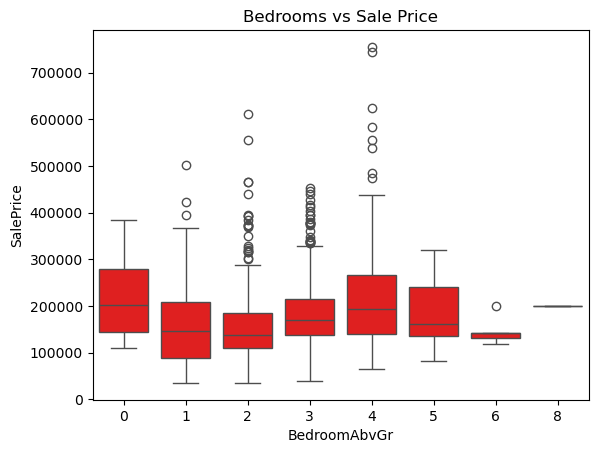

In [36]:
sns.boxplot(x='BedroomAbvGr',y='SalePrice', data=df, color='red')
plt.title("Bedrooms vs Sale Price")
plt.show()
#The number of bedrooms alone does not show a strong linear relationship with SalePrice. 
#Properties with 3–4 bedrooms dominate the dataset, while higher bedroom counts do not necessarily result in higher prices, 
#indicating that size and quality matter more than bedroom count alone.

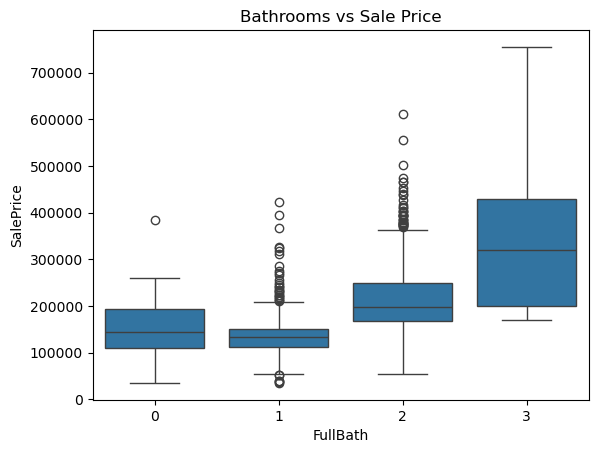

In [28]:
sns.boxplot(x='FullBath',y='SalePrice', data=df)
plt.title("Bathrooms vs Sale Price")
plt.show()
#SalePrice generally increases with the number of full bathrooms. 
#Houses with 2 or more full bathrooms tend to have higher prices, 
#highlighting bathrooms as an important contributor to property valuation.

In [29]:
fig = px.scatter(df,x="TotalSF",y="SalePrice",title="Total Square Footage vs Sale Price",opacity=0.7,color_discrete_sequence=["#1f77b4"])
fig.show()
#TotalSF shows a strong positive relationship with SalePrice. 
#Properties with greater total square footage command significantly higher prices, confirming the importance of overall size in pricing decisions.

### Market Trends & Historical Pricing

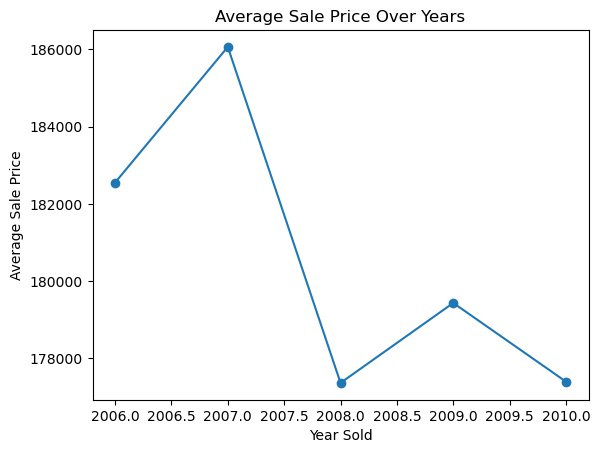

In [30]:
df.groupby('YrSold')['SalePrice'].mean().plot(kind='line', marker='o')
plt.title("Average Sale Price Over Years")
plt.xlabel("Year Sold")
plt.ylabel("Average Sale Price")
plt.show()
#The time-series analysis indicates that the average sale price peaked around 2007, followed by a noticeable decline in 2008. 
#This drop may reflect broader market or economic conditions during that period. 
#Prices show partial recovery in 2009 but remain relatively lower in 2010, suggesting a period of market instability

### Customer Preferences & Amenities

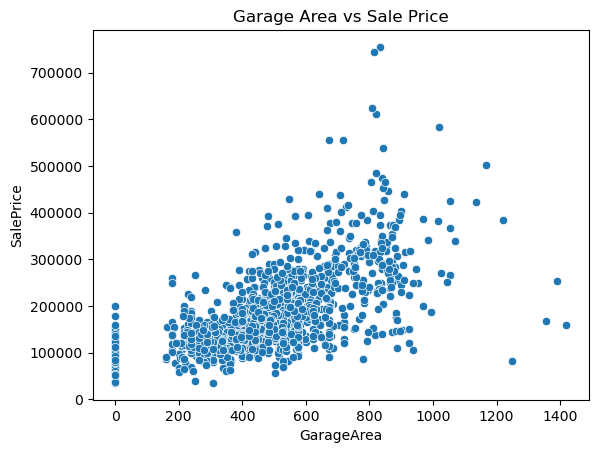

In [31]:
sns.scatterplot(x='GarageArea', y='SalePrice', data=df)
plt.title("Garage Area vs Sale Price")
plt.show()
#GarageArea shows a clear positive relationship with SalePrice. 
#Larger garage spaces are associated with higher house prices, 
#indicating that parking capacity and storage space are valued amenities.

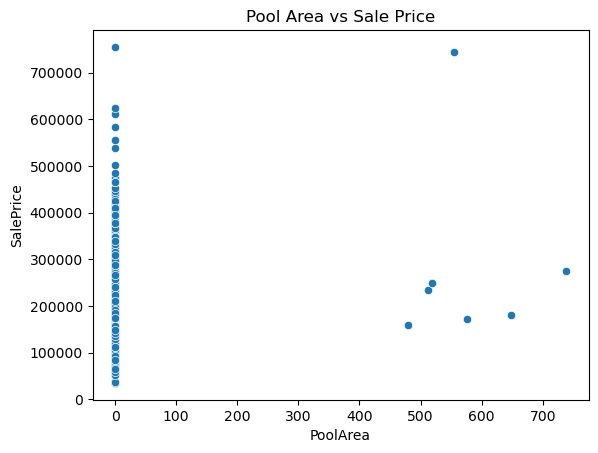

In [32]:
sns.scatterplot(x='PoolArea', y='SalePrice', data=df)
plt.title("Pool Area vs Sale Price")
plt.show()
#Most properties have no pool area, but houses with pools generally fall into higher price ranges. 
#This suggests that pools are premium amenities that increase property value, though they are relatively rare.